In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns


## Load the data

- https://data.cityofnewyork.us/resource/w2pb-icbu.json this is provided by the NYC Opendata as API data. The csv is heavy as it has 761K rows

- using only 1000 as this is not the complete solution but to give sample/view of how it can be solved. This is baseline and students are required to build better data

In [ ]:
#This intuition is tested on students how well they understand required data and ability to handle big data
# using only 1000 as this is not the complete solution but to give sample/view of how it can be solved. This is baseline and students are required to build better data as the project runs entire semester
url = "https://data.cityofnewyork.us/resource/w2pb-icbu.json?$limit=1000"
sales = pd.read_json(url)
sales.head()

,borough,neighborhood,building_class_category,tax_class_as_of_final_roll,block,lot,building_class_as_of_final,address,apartment_number,zip_code,...,sale_price,sale_date,latitude,longitude,community_board,council_district,bin,bbl,census_tract_2020,nta
0,1,MIDTOWN WEST,47 CONDO NON-BUSINESS STORAGE,4,1042,1316,RS,310 WEST 52ND STREET,SU1,10019,...,0,2016-01-01T00:00:00.000,40.763740,-73.985680,104.0,3.0,1087538.0,1.010428e+09,133.0,MN0402
1,1,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,S9,60 PEARL STREET,NaN,10004,...,4027000,2016-01-01T00:00:00.000,40.703553,-74.011152,101.0,1.0,1000014.0,1.000070e+09,9.0,MN0101
2,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1,1643,122,A4,155 EAST 115 STREET,NaN,10029,...,0,2016-01-01T00:00:00.000,40.797761,-73.941667,111.0,8.0,1052276.0,1.016430e+09,182.0,MN1102
3,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1643,123,C5,157 EAST 115 STREET,NaN,10029,...,0,2016-01-01T00:00:00.000,40.797744,-73.941627,111.0,8.0,1052277.0,1.016430e+09,182.0,MN1102
4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1320,4247,R4,211 EAST 46TH STREET,33J,10017,...,0,2016-01-01T00:00:00.000,40.753118,-73.972085,106.0,4.0,1037599.0,1.013208e+09,90.0,MN0604


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   borough                     1000 non-null   int64  
 1   neighborhood                1000 non-null   object 
 2   building_class_category     1000 non-null   object 
 3   tax_class_as_of_final_roll  996 non-null    object 
 4   block                       1000 non-null   int64  
 5   lot                         1000 non-null   int64  
 6   building_class_as_of_final  996 non-null    object 
 7   address                     1000 non-null   object 
 8   apartment_number            214 non-null    object 
 9   zip_code                    1000 non-null   int64  
 10  residential_units           1000 non-null   int64  
 11  commercial_units            1000 non-null   int64  
 12  total_units                 1000 non-null   int64  
 13  land_square_feet            1000 n

In [ ]:
sales.describe()

,borough,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale,sale_price,latitude,longitude,community_board,council_district,bin,bbl,census_tract_2020
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,952.000000,952.000000,952.000000,952.000000,9.510000e+02,9.510000e+02,952.000000
mean,2.759000,3753.050000,361.498000,10720.286000,2.717000,0.14200,2.896000,1802.530000,1.802000,1.206550e+06,40.711290,-73.943013,284.232143,25.355042,2.896838e+06,2.805875e+09,9342.649160
std,1.311732,3178.111505,674.280376,948.546374,29.998981,0.47546,30.042665,514.481053,0.950631,7.759942e+06,0.080180,0.093875,131.309212,16.584614,1.367123e+06,1.328006e+09,23334.600827
min,1.000000,7.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000e+00,40.505078,-74.252115,101.000000,1.000000,1.000014e+06,1.000070e+09,1.000000
25%,1.000000,1183.750000,20.000000,10075.000000,0.000000,0.00000,1.000000,1920.000000,1.000000,0.000000e+00,40.642730,-73.989603,108.000000,7.000000,1.087800e+06,1.016559e+09,138.000000
50%,3.000000,2798.000000,49.000000,11201.000000,1.000000,0.00000,1.000000,1937.000000,2.000000,4.000000e+05,40.720847,-73.953770,309.000000,27.000000,3.127818e+06,3.036080e+09,390.500000
75%,4.000000,5785.000000,233.250000,11234.000000,2.000000,0.00000,2.000000,1965.000000,2.000000,8.662500e+05,40.765484,-73.878402,405.250000,40.000000,4.093158e+06,4.029870e+09,1445.500000
max,5.000000,16301.000000,6003.000000,11694.000000,914.000000,4.00000,915.000000,2015.000000,4.000000,2.008500e+08,40.906656,-73.709482,503.000000,51.000000,5.169592e+06,5.080290e+09,157902.000000


In [ ]:
sales.head()

,borough,neighborhood,building_class_category,tax_class_as_of_final_roll,block,lot,building_class_as_of_final,address,apartment_number,zip_code,...,sale_price,sale_date,latitude,longitude,community_board,council_district,bin,bbl,census_tract_2020,nta
0,1,MIDTOWN WEST,47 CONDO NON-BUSINESS STORAGE,4,1042,1316,RS,310 WEST 52ND STREET,SU1,10019,...,0,2016-01-01T00:00:00.000,40.763740,-73.985680,104.0,3.0,1087538.0,1.010428e+09,133.0,MN0402
1,1,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,S9,60 PEARL STREET,NaN,10004,...,4027000,2016-01-01T00:00:00.000,40.703553,-74.011152,101.0,1.0,1000014.0,1.000070e+09,9.0,MN0101
2,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1,1643,122,A4,155 EAST 115 STREET,NaN,10029,...,0,2016-01-01T00:00:00.000,40.797761,-73.941667,111.0,8.0,1052276.0,1.016430e+09,182.0,MN1102
3,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1643,123,C5,157 EAST 115 STREET,NaN,10029,...,0,2016-01-01T00:00:00.000,40.797744,-73.941627,111.0,8.0,1052277.0,1.016430e+09,182.0,MN1102
4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1320,4247,R4,211 EAST 46TH STREET,33J,10017,...,0,2016-01-01T00:00:00.000,40.753118,-73.972085,106.0,4.0,1037599.0,1.013208e+09,90.0,MN0604


In [ ]:
sales.dtypes.value_counts()

,count
object,11
int64,10
float64,7


Understanding the data:
- This data provides transaction level granualarity to model individual property prices
- Verified source - NYC Government
- As mentioned in preliminary report, we have time, spatial and categorical dimensions for plotting the trend in ROI analysis


## Data Preprocessing

-  There are differences in non-null values and types of values filled. let's dig in

In [ ]:
# these are irrelevant
drop_cols = [
    'address', 'block', 'lot', 'bin', 'bbl', 'apartment_number',
    'community_board', 'council_district'
]
sales = sales.drop(columns=[c for c in drop_cols if c in sales.columns])

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   borough                     1000 non-null   int64         
 1   neighborhood                1000 non-null   object        
 2   building_class_category     1000 non-null   object        
 3   tax_class_as_of_final_roll  996 non-null    object        
 4   building_class_as_of_final  996 non-null    object        
 5   zip_code                    1000 non-null   int64         
 6   residential_units           1000 non-null   int64         
 7   commercial_units            1000 non-null   int64         
 8   total_units                 1000 non-null   int64         
 9   land_square_feet            434 non-null    float64       
 10  gross_square_feet           473 non-null    float64       
 11  year_built                  1000 non-null   int64        

In [ ]:
# Let's make sure numerical are numeric, the pandas allows us to do it
num_cols = ['sale_price', 'land_square_feet', 'gross_square_feet']
for col in num_cols:
    sales[col] = pd.to_numeric(sales[col], errors='coerce')

In [ ]:
sales.describe() #better way to describe numeric columns #the above interested columns are good

,borough,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,sale_date,latitude,longitude,census_tract_2020,year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,434.000000,473.000000,1000.000000,1000.000000,1.000000e+03,1000,952.000000,952.000000,952.000000,1000.0
mean,2.759000,10720.286000,2.717000,0.14200,2.896000,17.235023,33.369979,1802.530000,1.802000,1.206550e+06,2016-01-05 02:45:36.000000256,40.711290,-73.943013,9342.649160,2016.0
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,2016-01-01 00:00:00,40.505078,-74.252115,1.000000,2016.0
25%,1.000000,10075.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1920.000000,1.000000,0.000000e+00,2016-01-04 00:00:00,40.642730,-73.989603,138.000000,2016.0
50%,3.000000,11201.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1937.000000,2.000000,4.000000e+05,2016-01-05 00:00:00,40.720847,-73.953770,390.500000,2016.0
75%,4.000000,11234.000000,2.000000,0.00000,2.000000,0.000000,0.000000,1965.000000,2.000000,8.662500e+05,2016-01-06 00:00:00,40.765484,-73.878402,1445.500000,2016.0
max,5.000000,11694.000000,914.000000,4.00000,915.000000,950.000000,999.000000,2015.000000,4.000000,2.008500e+08,2016-01-07 00:00:00,40.906656,-73.709482,157902.000000,2016.0
std,1.311732,948.546374,29.998981,0.47546,30.042665,113.613868,169.495052,514.481053,0.950631,7.759942e+06,NaN,0.080180,0.093875,23334.600827,0.0


In [ ]:
# Handling  Dates
sales['sale_date'] = pd.to_datetime(sales['sale_date'], errors='coerce')
sales['year'] = sales['sale_date'].dt.year
sales['month'] = sales['sale_date'].dt.month

In [ ]:
sales.describe()

,borough,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,sale_date,latitude,longitude,census_tract_2020,year,month
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,434.000000,473.000000,1000.000000,1000.000000,1.000000e+03,1000,952.000000,952.000000,952.000000,1000.0,1000.0
mean,2.759000,10720.286000,2.717000,0.14200,2.896000,17.235023,33.369979,1802.530000,1.802000,1.206550e+06,2016-01-05 02:45:36.000000256,40.711290,-73.943013,9342.649160,2016.0,1.0
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,2016-01-01 00:00:00,40.505078,-74.252115,1.000000,2016.0,1.0
25%,1.000000,10075.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1920.000000,1.000000,0.000000e+00,2016-01-04 00:00:00,40.642730,-73.989603,138.000000,2016.0,1.0
50%,3.000000,11201.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1937.000000,2.000000,4.000000e+05,2016-01-05 00:00:00,40.720847,-73.953770,390.500000,2016.0,1.0
75%,4.000000,11234.000000,2.000000,0.00000,2.000000,0.000000,0.000000,1965.000000,2.000000,8.662500e+05,2016-01-06 00:00:00,40.765484,-73.878402,1445.500000,2016.0,1.0
max,5.000000,11694.000000,914.000000,4.00000,915.000000,950.000000,999.000000,2015.000000,4.000000,2.008500e+08,2016-01-07 00:00:00,40.906656,-73.709482,157902.000000,2016.0,1.0
std,1.311732,948.546374,29.998981,0.47546,30.042665,113.613868,169.495052,514.481053,0.950631,7.759942e+06,NaN,0.080180,0.093875,23334.600827,0.0,0.0


In [ ]:
sales['sale_price'].describe()

,sale_price
count,1.000000e+03
mean,1.206550e+06
std,7.759942e+06
min,0.000000e+00
25%,0.000000e+00
50%,4.000000e+05
75%,8.662500e+05
max,2.008500e+08


In [ ]:
#Let's remove zero from our output variable sale prices
sales = sales[sales['sale_price'] > 10000]

# Replace unrealistic year_built (<1800 or future years)
sales.loc[(sales['year_built'] < 1800) | (sales['year_built'] > 2025), 'year_built'] = np.nan
sales['year_built'].fillna(sales['year_built'].median(), inplace=True)

# Replace invalid sqft values (0 or missing)
sales.loc[sales['gross_square_feet'] <= 0, 'gross_square_feet'] = np.nan
sales.loc[sales['land_square_feet'] <= 0, 'land_square_feet'] = np.nan

/tmp/ipython-input-425929775.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['year_built'].fillna(sales['year_built'].median(), inplace=True)


In [ ]:
# Fill categorical NAs with "UNKNOWN" for modeling consistency
cat_cols = ['tax_class_as_of_final_roll', 'building_class_as_of_final',
            'building_class_category', 'nta']
for col in cat_cols:
    sales[col] = sales[col].fillna('UNKNOWN')

In [ ]:
#adding comments why students do each step, brings points from Explainability section

In [ ]:
#Using below engineered features as they describe better.
if 'price_per_sqft' not in sales.columns:
    sales['price_per_sqft'] = np.where(
        pd.to_numeric(sales['gross_square_feet'], errors='coerce') > 0,
        pd.to_numeric(sales['sale_price'], errors='coerce') /
        pd.to_numeric(sales['gross_square_feet'], errors='coerce'),
        np.nan
    )

if 'building_age' not in sales.columns:
    sales['building_age'] = 2025 - pd.to_numeric(sales['year_built'], errors='coerce')
    sales.loc[sales['building_age'] < 0, 'building_age'] = np.nan

if 'log_sale_price' not in sales.columns:
    sales['log_sale_price'] = np.log1p(pd.to_numeric(sales['sale_price'], errors='coerce'))


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 1 to 999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   borough                     681 non-null    int64         
 1   neighborhood                681 non-null    object        
 2   building_class_category     681 non-null    object        
 3   tax_class_as_of_final_roll  681 non-null    object        
 4   building_class_as_of_final  681 non-null    object        
 5   zip_code                    681 non-null    int64         
 6   residential_units           681 non-null    int64         
 7   commercial_units            681 non-null    int64         
 8   total_units                 681 non-null    int64         
 9   land_square_feet            6 non-null      float64       
 10  gross_square_feet           10 non-null     float64       
 11  year_built                  681 non-null    float64       
 12 

In [ ]:
# Above describe shows that few columns are needed to be dropped as there is less than 10% of data is available
threshold = 0.1 * len(sales)
sparse_cols = [col for col in sales.columns if sales[col].notna().sum() < threshold]

sales = sales.drop(columns=sparse_cols)

#checking engineered features
if 'price_per_sqft' in sales.columns:
    sales.drop(columns=['price_per_sqft'], inplace=True)

sales['building_age'] = 2025 - sales['year_built']
sales.loc[sales['building_age'] < 0, 'building_age'] = np.nan

sales['log_sale_price'] = np.log1p(sales['sale_price'])


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 1 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   borough                     681 non-null    int64         
 1   neighborhood                681 non-null    object        
 2   building_class_category     681 non-null    object        
 3   tax_class_as_of_final_roll  681 non-null    object        
 4   building_class_as_of_final  681 non-null    object        
 5   zip_code                    681 non-null    int64         
 6   residential_units           681 non-null    int64         
 7   commercial_units            681 non-null    int64         
 8   total_units                 681 non-null    int64         
 9   year_built                  681 non-null    float64       
 10  tax_class_at_time_of_sale   681 non-null    int64         
 11  building_class_at_time_of   681 non-null    object        
 12 

## Concluding Data preprocessing with above features

## EDA

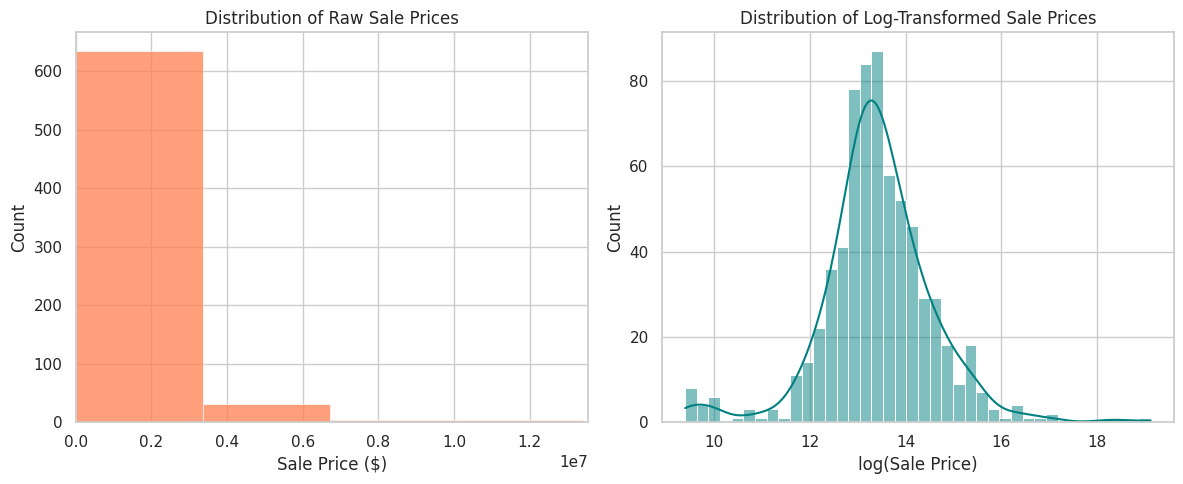

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(sales['sale_price'], bins=60, color='coral')
plt.title('Distribution of Raw Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.xlim(0, sales['sale_price'].quantile(0.99))

plt.subplot(1,2,2)
sns.histplot(sales['log_sale_price'], bins=40, kde=True, color='teal')
plt.title('Distribution of Log-Transformed Sale Prices')
plt.xlabel('log(Sale Price)')
plt.tight_layout()
plt.show()


In [ ]:
# Idea to use engineered feature or log transformation normalizes the distribution, making it suitable for predictive modeling.

/tmp/ipython-input-4245842292.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=borough_summary, x='borough', y='median', palette='crest')


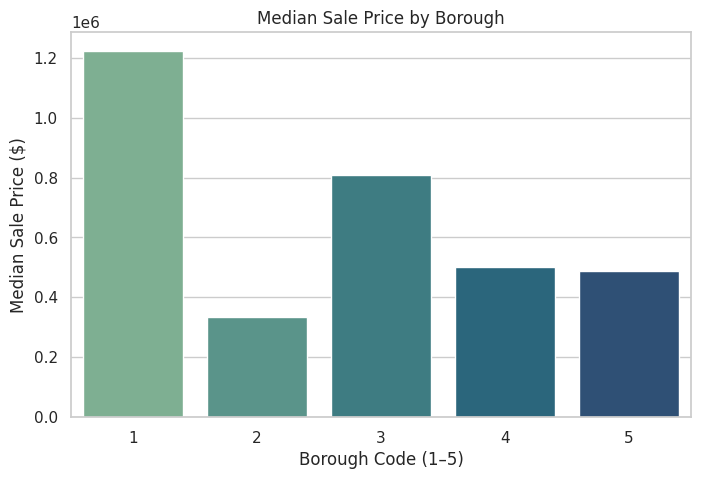


Borough summary (median, mean, count):


,borough,median,mean,count
0,1,"$1,223,625","$3,911,256",209
1,2,"$336,000","$543,708",66
2,3,"$807,500","$1,120,974",184
3,4,"$500,000","$642,948",161
4,5,"$488,000","$711,998",61


In [ ]:

borough_summary = (
    sales.groupby('borough')['sale_price']
    .agg(['median','mean','count'])
    .sort_index()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=borough_summary, x='borough', y='median', palette='crest')
plt.title('Median Sale Price by Borough')
plt.xlabel('Borough Code (1–5)')
plt.ylabel('Median Sale Price ($)')
plt.show()

print("\nBorough summary (median, mean, count):")
display(borough_summary.style.format({'median':'${:,.0f}','mean':'${:,.0f}','count':'{:,}'}))


In [ ]:
# Manhattan remains the most expensive, but ROI potential is limited.
# Brooklyn, Queens, and Bronx show stronger investment potential as they are reasonable prices meaning there will be higher appreciation rates,
# and expanding demand

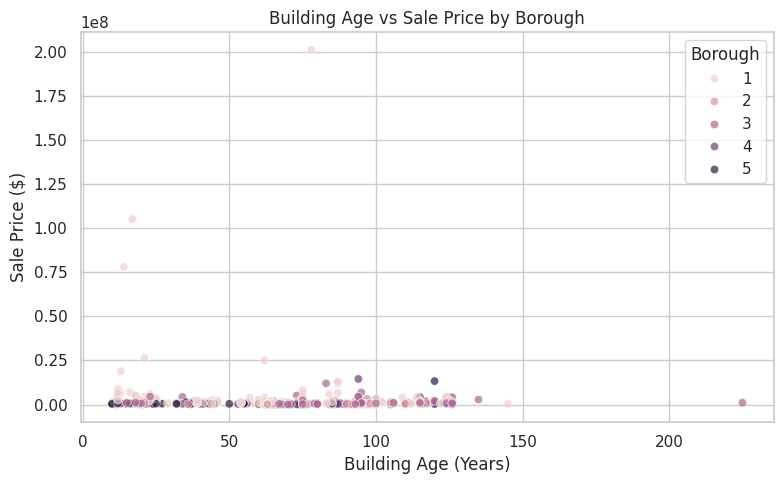

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='building_age', y='sale_price',
    hue='borough', data=sales, alpha=0.7
)
plt.title('Building Age vs Sale Price by Borough')
plt.xlabel('Building Age (Years)')
plt.ylabel('Sale Price ($)')
plt.legend(title='Borough')
plt.tight_layout()
plt.show()



In [ ]:
# No strong  relationship

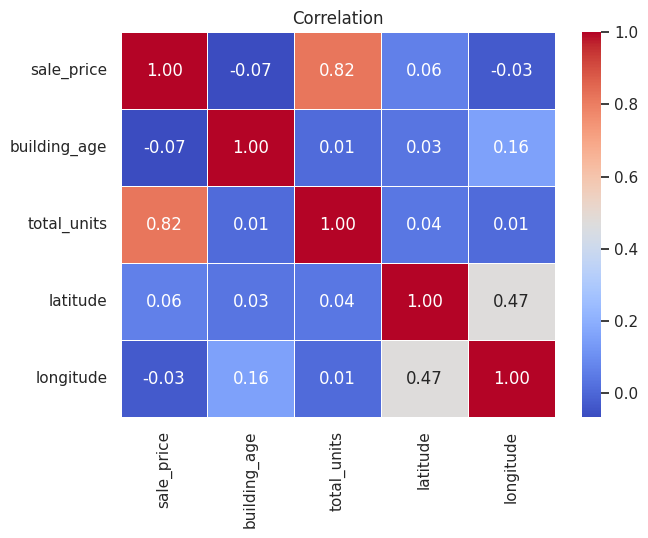

In [ ]:
num_features = ['sale_price', 'building_age', 'total_units', 'latitude', 'longitude']
corr = sales[num_features].corr(numeric_only=True)

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation')
plt.show()

In [ ]:
#sale_price has a strong positive correlation (0.82) with total_units, showing scale drives valuation.

 #Weak correlation with building_age confirms that age alone does not determine property pric

### students need to write what are their observations for the EDA. How will they do the feature engineering


# Feature Engineering

In [ ]:
#  Structural Features are important Building age
sales['building_age'] = 2025 - sales['year_built']
sales.loc[sales['building_age'] < 0, 'building_age'] = np.nan

# Log-transform sale price or normalisation
sales['log_sale_price'] = np.log1p(sales['sale_price'])

# Ratio-based metrics (features)
sales['unit_density'] = np.where(
    sales['total_units'] > 0,
    sales['total_units'] / (sales['building_age'] + 1),
    np.nan
)
sales['unit_density'] = sales['unit_density'].replace([np.inf, -np.inf], np.nan)

#Temporal Features
sales['sale_year'] = sales['sale_date'].dt.year
sales['sale_month'] = sales['sale_date'].dt.month
sales['is_recent_sale'] = (sales['sale_year'] >= sales['sale_year'].max() - 1).astype(int)

# Encode borough numerically
sales['borough_code'] = sales['borough'].astype('category').cat.codes


# Categorical Encoding
cat_features = ['borough', 'building_class_category',
                'tax_class_as_of_final_roll', 'building_class_as_of_final', 'nta']

for col in cat_features:
    sales[col] = sales[col].astype('category')

# One-hot encode selected categorical columns for model use
sales_encoded = pd.get_dummies(
    sales,
    columns=['borough', 'tax_class_as_of_final_roll', 'building_class_category'],
    drop_first=True
)

#  Collinear or Non-informative Variables  from above correlation matrix
drop_cols = ['year_built', 'sale_date', 'neighborhood', 'building_class_at_time_of']
sales_encoded = sales_encoded.drop(columns=[c for c in drop_cols if c in sales_encoded.columns])

# Capture nonlinear relationships
sales_encoded['age_price_interaction'] = sales_encoded['building_age'] * sales_encoded['log_sale_price']
sales_encoded['unit_price_interaction'] = sales_encoded['total_units'] * sales_encoded['log_sale_price']

In [ ]:
sales_encoded.head()

,building_class_as_of_final,zip_code,residential_units,commercial_units,total_units,tax_class_at_time_of_sale,sale_price,latitude,longitude,census_tract_2020,...,building_class_category_31 COMMERCIAL VACANT LAND,building_class_category_34 THEATRES,building_class_category_35 INDOOR PUBLIC AND CULTURAL FACILITIES,building_class_category_37 RELIGIOUS FACILITIES,building_class_category_43 CONDO OFFICE BUILDINGS,building_class_category_44 CONDO PARKING,building_class_category_45 CONDO HOTELS,building_class_category_47 CONDO NON-BUSINESS STORAGE,age_price_interaction,unit_price_interaction
1,S9,10004,3,2,5,2,4027000,40.703553,-74.011152,9.0,...,False,False,False,False,False,False,False,False,1901.066561,76.042662
14,K1,10462,0,1,1,4,384000,40.854793,-73.865730,22403.0,...,False,False,False,False,False,False,False,False,1195.831241,12.858400
15,K1,10462,0,1,1,4,384000,40.854793,-73.865730,22403.0,...,False,False,False,False,False,False,False,False,1195.831241,12.858400
16,K1,10462,0,1,1,4,2288000,40.854793,-73.865730,22403.0,...,False,False,False,False,False,False,False,False,1361.816583,14.643189
17,K1,10462,0,1,1,4,384000,40.854793,-73.865730,22403.0,...,False,False,False,False,False,False,False,False,1195.831241,12.858400


In [ ]:
#Engineered features such as building_age, total_units, spatial encodings, and one-hot property categories were designed
#to capture structural, temporal, and locational factors influencing property valuation and ROI potential.

In [ ]:
#A tree-based ensemble model (e.g., Random Forest or XGBoost) is ideal, as it can automatically learn nonlinear relationships and feature
#interactions—revealing which property and market characteristics most strongly drive price appreciation.

# Modeling

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None)))

In [ ]:
#  Define Input and Output
target = 'log_sale_price'
exclude = [target, 'sale_price']

X = sales_encoded.drop(columns=[c for c in exclude if c in sales_encoded.columns])
X = X.select_dtypes(include=['number']).copy()

# One-hot encode remaining categorical variables safely
X = pd.get_dummies(X, drop_first=True, dtype=float)

y = sales_encoded[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model =
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1
)
model.fit(X_train, y_train)

#  Predictions & Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)



R² Score: 0.692
Mean Absolute Error: 0.274
MAPE: 2.06%


/tmp/ipython-input-1950091891.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(15), x='Importance', y='Feature', palette='crest')


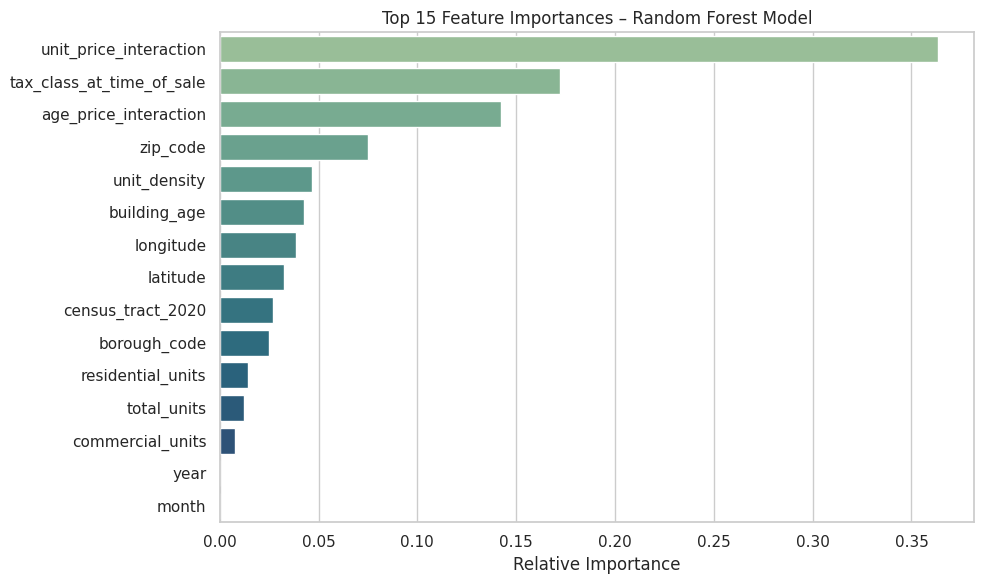

In [ ]:
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"MAPE: {mape:.2f}%")

#Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importances.head(15), x='Importance', y='Feature', palette='crest')
plt.title('Top 15 Feature Importances – Random Forest Model')
plt.xlabel('Relative Importance')
plt.ylabel('')
plt.tight_layout()
plt.show()


- The model confirms that ROI is primarily driven by property scale, tax classification, and location quality.
- For our first $10 M client investment, the strategy should prioritize multi-unit residential assets in high-density zip codes of Brooklyn and Queens, where tax-class stability and appreciation rates are highest.
- Manhattan remains mature and low-growth, while the outer boroughs offer superior ROI potential within controlled risk boundaries.